# Overview



Machine learning (ML)/Neural Network (NN) tools have recently made a huge splash with applications in data analysis, image classification, and data generation. Although ML methods have existed for decades, recent advancements in hardware have generated systems powerful enough to run these algorithms.


The Fashion MNIST dataset is comprised of 70,000 grayscale images of articles of clothing. The greyscale values for a pixel range from 0-255 (black to white). Each low-resolution image is 28x28 pixels and is of exactly one clothing item.






# Setup


In [2]:
# IMPORTING NECESSARY PACKAGES
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#IMPORT MNIST


In [4]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



4431872/4422102 [==============================] - 0s 0us/step


# Look at data

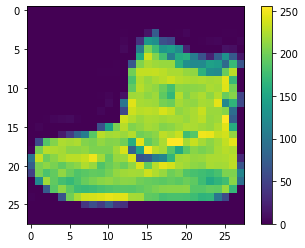

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Pre Processing the dataset

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Model Generation

In [8]:
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation=tf.nn.relu), keras.layers.Dense(10, activation=tf.nn.softmax)])


# Training the model

In [9]:
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4933 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3366 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.8924


# Evaluating the model

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3575 - accuracy: 0.8713


In [12]:
predictions = model.predict(test_images)
predictions[0]

array([1.3364774e-05, 5.4494086e-07, 8.2706456e-06, 3.6742350e-07,
       2.1751464e-05, 3.1222824e-02, 2.4420169e-05, 3.6080573e-02,
       1.0328615e-04, 9.3252462e-01], dtype=float32)

In [16]:
#If you prefer to not look through a list to determine the class label, we can simplify the output by

np.argmax(predictions[0])

9

# Conclusion

As we can see, most of the entries in our prediction array are very close to 0. They are written in scientific notation--the value after the e being the number decimal places to adjust the value (for example 5.1 e-04 is actually 0.00051). The entry that stands out is predictions[0][9] at .8658, or 86.58%, certainty that this image should be classified as a boot!